## Imports

In [1]:
from astropy.table import Table
import functions as func
from astropy.time import Time
import importlib as imp
import os
import numpy as np

## Get the DBQSO catalog

In [2]:
path = os.getcwd()
file_path = os.path.join(path, "DB_QSO_S82.dat.gz")
if not os.path.exists(file_path):
    # Get the quasar catalog - it gets saved in the same directory as the notebook 
    url = "https://faculty.washington.edu/ivezic/macleod/qso_dr7/DB_QSO_S82.dat.gz"
    os.system(f'wget {url}')   

## Load the combined SDSS-ZTF-PS1 data

First, of the entire CLQSO  catalog of 40 objects, find out which quasars have the ZTF data:

In [3]:
colnames = ['dbID', 'SDSSJID', 'ra', 'dec',	'Redshift', 'log10_Lbol', 'log10_MBH', 
            'f_Edd','Delta(mag)',
            'Delta(sigma_G)', 'MedianPS1']
clqso = Table.read("CLQSO_candidates.txt", format='ascii',
                   names=colnames)

In [4]:
# find out what objects have ZTF data in the given directory
dr_path = os.path.join(os.getcwd(), 'ZTFDR17')
ztf_all_bands = func.get_ztf_file_list(dr_path)

# select only r-band 
ztf_r_band = [file for file in ztf_all_bands if file.__contains__("_r.")]

# get only the SDSS_JID,  i.e. J222918.25-004003.6 from file name 
ztf_r_band_sdss_jid =  [name.split('_')[0][1:] for name in ztf_r_band]

# select those CLQSO candidates with ZTF data
mask = np.in1d(clqso['SDSSJID'],ztf_r_band_sdss_jid)
clqso_with_ztf = clqso[mask]

Plot a combined ligth curve for the first CLQSO:

Based on given 001626.54+003632.4, found data for J001626.54+003632.4_ZTF_r.csv
Using provided 001626.54+003632.4
Got ZTF_filename
Got SDSS_JID
Got SDSS_dbID
Got ztf_original
Got ztf_synthetic
Got sdss
Got ps1

ps1
Unique days:11 total number of observations: 19

ztf_synthetic
Unique days:168 total number of observations: 200
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_00162_combined_.png in /Users/chris/GradResearch/2023-clqso-ps1-ztf/code


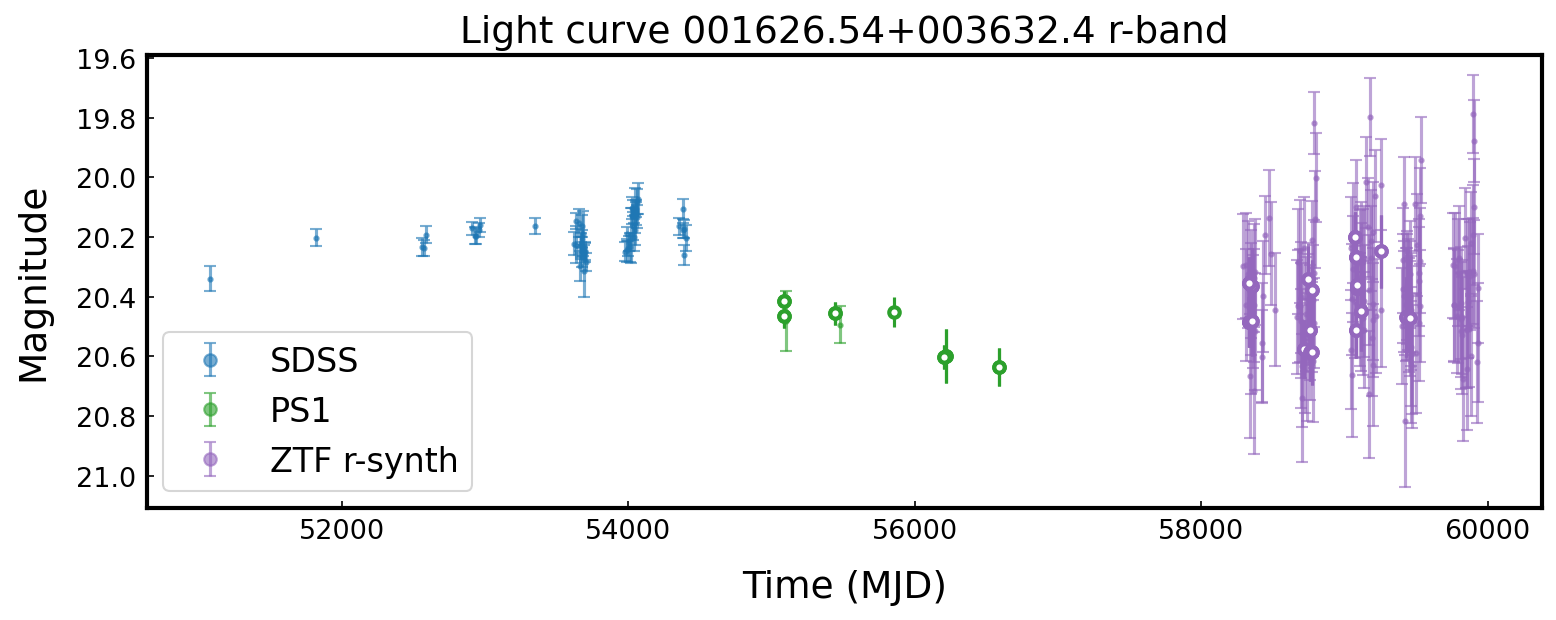

In [5]:
sdss_name = clqso_with_ztf['SDSSJID'][0]

# load the SDSS, PS1, ZTF data 
data_r_band = func.get_data_to_dict(dr_path,
                                    sdss_jid=sdss_name)
# day-average, perform sigma clipping 
avg_data_r = func.average_data(data_r_band, 
                               surveys_to_average=['ps1','ztf_synthetic'], 
                               Nsigma = 5)
# plot the data 
func.plot_averaged_data(avg_data_r, plot_flagged=False, mjds=[])